In [25]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML # for HTMl tag use in python

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/JeevanshuDua/csvfiles/main/heart.csv")

<h2 id="Exploratory-Analysis">Exploratory Analysis</h2>
<p>There are thirteen features and one target as below:</p>
<ul>
<li>age: The person's age in years</li>
<li>sex: The person's sex (1 = male, 0 = female)</li>
<li>cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)</li>
<li>trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)</li>
<li>chol: The person's cholesterol measurement in mg/dl</li>
<li>fbs: The person's fasting blood sugar (&gt; 120 mg/dl, 1 = true; 0 = false)</li>
<li>restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)</li>
<li>thalach: The person's maximum heart rate achieved</li>
<li>exang: Exercise induced angina (1 = yes; 0 = no)</li>
<li>oldpeak: ST depression induced by exercise relative to rest</li>
<li>slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)</li>
<li>ca: The number of major vessels (0-3)</li>
<li>
<p>thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)</p>
</li>
<li>
<p>target: Heart disease (0 = no, 1 = yes)</p>
</li>
</ul>

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:>

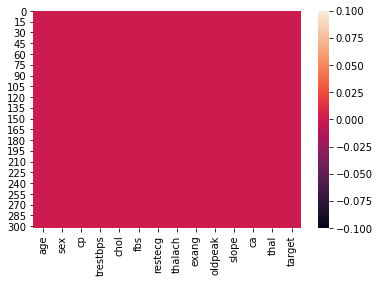

In [5]:
sns.heatmap(data.isnull())

In [6]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

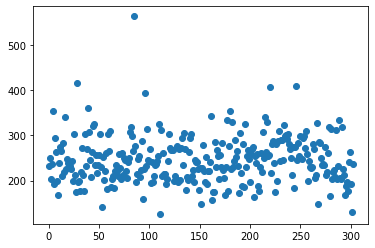

In [7]:
plt.scatter(data.index, data['chol'])

In [8]:
li = list(data['chol'].sort_values()[-5:].index)
li

[96, 220, 246, 28, 85]

In [9]:
data = data.drop(li,axis = 0)

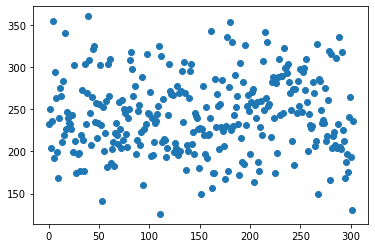

In [10]:
plt.scatter(data.index, data['chol'])

In [11]:
data.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
data.reset_index(drop=True,inplace=True)

In [13]:
data.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
encoder = preprocessing.LabelEncoder()

for i in data.columns:
    if isinstance(data[i][0], str):
            data[i] = encoder.fit_transform(data[i])

In [15]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
data.target.value_counts() 

1    162
0    136
Name: target, dtype: int64

In [17]:
diffrence=data.target.value_counts()[1]-data.target.value_counts()[0] 
diffrence

26

In [18]:
li = data[data['target']==1].sample(diffrence).index
li

Int64Index([ 72, 112, 124,  41, 146, 119,  80,  44,  70,  10, 115,  81,  47,
             14,  73, 103,  11, 152,  40,  86, 116, 154,  83, 161,  88,  89],
           dtype='int64')

In [19]:
data = data.drop(li, axis = 0)
data.target.value_counts()

0    136
1    136
Name: target, dtype: int64

In [20]:
X = data.drop(['target'], axis=1)
y = data['target']

###  Training and Testing with Logic Regression


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [26]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Train the model using 'fit' method
model.fit(X_train, y_train)
display(HTML(f'Training score  : <b>{round(model.score(X_train, y_train),3)*100}%</b>')) 

# Test the model using 'predict' method
y_pred = model.predict(X_test)
display(HTML(f'Predicted score : <b>{round(metrics.accuracy_score(y_test,y_pred),3)*100}%</b>'))

# Print the classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.88      0.88      0.88        26
           1       0.90      0.90      0.90        29

    accuracy                           0.89        55
   macro avg       0.89      0.89      0.89        55
weighted avg       0.89      0.89      0.89        55



Print the Confusion Matrix
[[23  3]
 [ 3 26]]


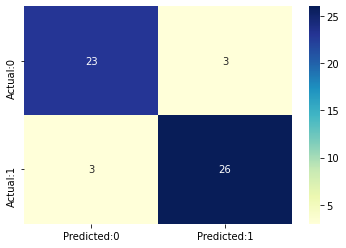

In [27]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print('Print the Confusion Matrix')
print(cm)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
#plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");